<a href="https://colab.research.google.com/github/konege/Second-Hand-Car-Price-Prediction/blob/main/mlops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 : Install MLflow and Import Libraries

In [1]:
!pip install mlflow # for machine learning lifecycle management
import numpy as np  # for numerical operations
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for creating visualizations
import seaborn as sns # for advanced data visualization
from sklearn.model_selection import train_test_split, RandomizedSearchCV # Scikit-learn for model selection and hyperparameter tuning
from sklearn.linear_model import LinearRegression # for linear regression modeling
from sklearn.ensemble import RandomForestRegressor # for regression using random forest algorithm
from sklearn.metrics import r2_score # for evaluating regression model performance
import mlflow # for tracking experiments and managing machine learning models
import mlflow.sklearn # MLflow's utilities for sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00


# Part 2: Load and Preprocess Dataset

In [2]:
# Load dataset
dataset = pd.read_csv('/content/car data.csv')

In [3]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data exploration

In [4]:
dataset.shape

(301, 9)

In [5]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Categorical Columns
dataset.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [8]:
len(dataset.select_dtypes(include='object').columns)

4

In [9]:
# Numerical Columns
dataset.select_dtypes(include=['float64', 'int64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [10]:
len(dataset.select_dtypes(include=['float64', 'int64']).columns)

5

In [11]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Dealing with missing values

In [12]:
dataset.isnull().values.any()

False

In [13]:
dataset.isnull().values.sum()

0

## Restructure the dataset

In [14]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Car_Name column is not correlated with the selling price.

That means we can drop this column.

In [15]:
dataset = dataset.drop(columns='Car_Name')

In [16]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [17]:
# Add a column
dataset['Current_Year'] = 2023

In [18]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [19]:
dataset['Car_Age'] = dataset['Current_Year'] - dataset['Year']

In [20]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [21]:
dataset = dataset.drop(columns=['Current_Year', 'Year'])

In [22]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


## Encoding the categorical data

In [23]:
dataset.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [24]:
len(dataset.select_dtypes(include='object').columns)

3

In [25]:
dataset['Fuel_Type'].nunique()

3

In [26]:
dataset['Seller_Type'].nunique()

2

In [27]:
dataset['Transmission'].nunique()

2

In [28]:
dataset.shape

(301, 8)

In [33]:
# One hot encoding
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [34]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [35]:
dataset.shape

(301, 9)

## Correlation matrix

In [36]:
dataset_2 = dataset.drop(columns='Selling_Price')

<Axes: title={'center': 'Correlated with Selling Price'}>

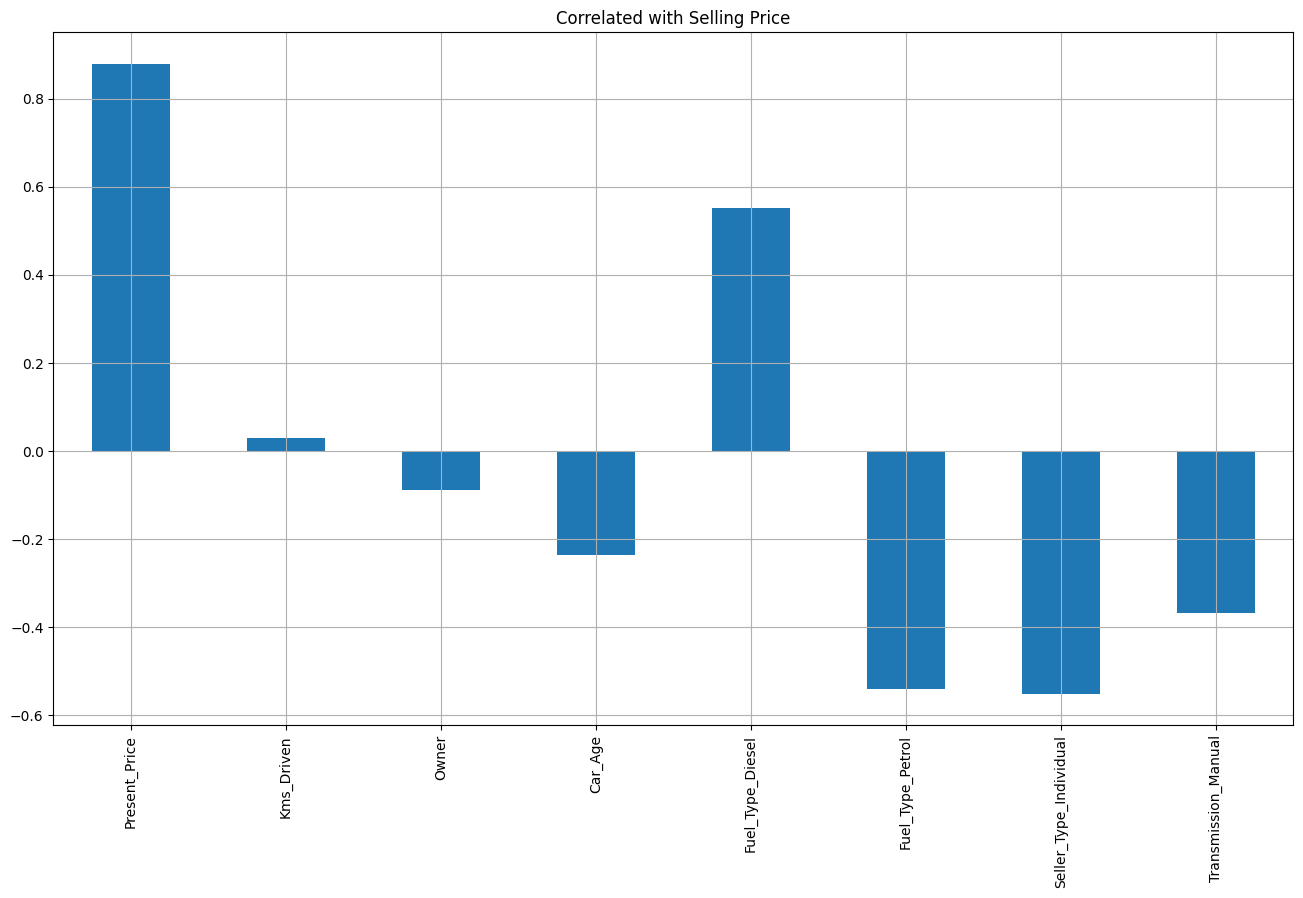

In [37]:
dataset_2.corrwith(dataset['Selling_Price']).plot.bar(
    figsize=(16,9), title='Correlated with Selling Price', grid=True
)

In [38]:
corr = dataset.corr()

Present_Price and Fuel_Type_Diesel correlated with our target variable(Selling_Price), others are negatively correlated with it.

<Axes: >

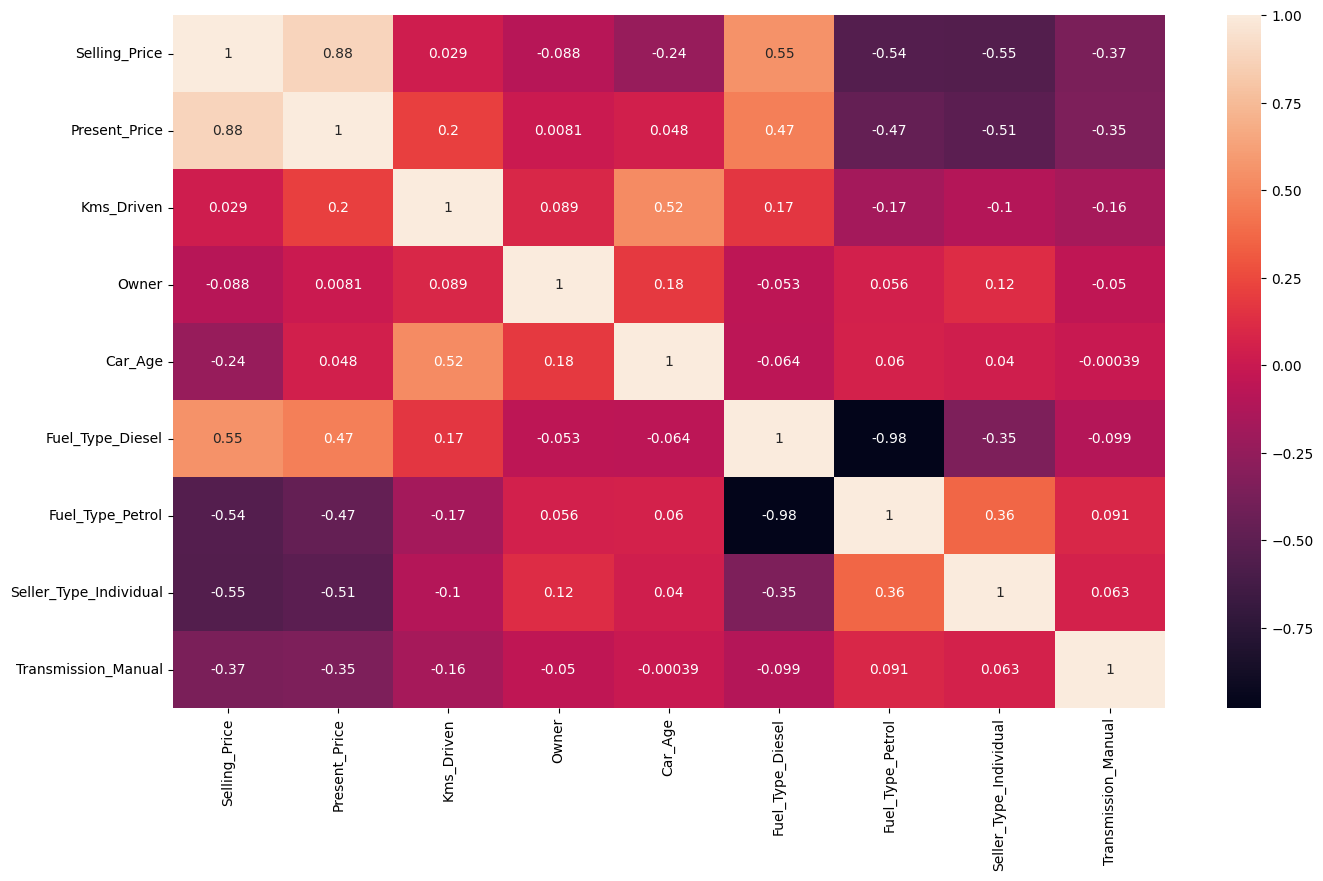

In [39]:
# Heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)

# Part 3: Splitting the Dataset

In [40]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


Split the dataset into training and testing sets.

In [41]:
# Drop the 'Selling_Price' column from the dataset and use the rest as features (X)
x = dataset.drop(columns='Selling_Price')

In [42]:
# Use the 'Selling_Price' column as the target variable (Y)
y = dataset['Selling_Price']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Split the dataset into training and test sets:

80% of the data is used for training (x_train, y_train)
20% of the data is used for testing (x_test, y_test)

The split is done randomly, with 'random_state=0' ensuring the split is reproducible

In [44]:
x_train.shape

(240, 8)

In [45]:
y_train.shape

(240,)

In [46]:
x_test.shape

(61, 8)

In [47]:
y_test.shape

(61,)

# Part 4: Building the model

## 1) Multiple linear regression

In [51]:
regressor_mlr = LinearRegression()
regressor_mlr.fit(x_train, y_train)

LinearRegression()

In [52]:
y_pred = regressor_mlr.predict(x_test)

In [53]:
r2_score(y_test, y_pred)

0.9144342972228519

## 2) Random forest regression

In [54]:
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [55]:
y_pred = regressor_rf.predict(x_test)

In [56]:
r2_score(y_test, y_pred)

0.9591236755249555

The random forest regression is working better than the multiple linear regression.

# Part 4: Hyperparameter Tuning and MLflow Tracking

In [57]:
# MLflow experiment tracking
with mlflow.start_run():

    # Hyperparameter tuning for RandomForestRegressor
    parameters = {
        'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
        'criterion': ['squared_error', 'absolute_error'],
        'max_depth': [10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 20, 50],
        'min_samples_leaf': [1, 2, 5, 10],
        'max_features': [1.0, 'sqrt', 'log2']
    }

    # Initialize the RandomForestRegressor model
    regressor_rf = RandomForestRegressor()

    # Set up RandomizedSearchCV for hyperparameter tuning with the defined parameters
    random_cv = RandomizedSearchCV(estimator=regressor_rf, param_distributions=parameters,
                                   n_iter=10, scoring='neg_mean_absolute_error',
                                   cv=5, verbose=2, n_jobs=-1)

    # Fit the model on training data (x_train and y_train should be defined before this step)
    random_cv.fit(x_train, y_train)

    # Log best parameters and estimator
    mlflow.log_params(random_cv.best_params_)

    # Retrieve and log the best model obtained from tuning
    best_regressor = random_cv.best_estimator_
    mlflow.sklearn.log_model(best_regressor, "random-forest-best-model")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# Part 5: Model Evaluation and Prediction

Evaluating the best model on the test set

In [58]:
y_pred = best_regressor.predict(x_test)  # Use the best regressor to make predictions on the test set

In [59]:
r2 = r2_score(y_test, y_pred)  # Calculate the R-squared value to assess model performance

In [60]:
mlflow.log_metric("r2_best_random_forest", r2)  # Log the R-squared value in MLflow

Predicting with a single observation

In [61]:
# Define the feature names
feature_names = ['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age',
                 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
                 'Seller_Type_Individual', 'Transmission_Manual']

In [62]:
single_obs = [[8.50, 3500, 0, 5, 1, 0, 0, 1]]  # Define a single observation for prediction

In [63]:
single_obs_df = pd.DataFrame(single_obs, columns=feature_names)  # Convert the single observation into a DataFrame

In [64]:
prediction = best_regressor.predict(single_obs_df)  # Make a prediction using the best regressor

In [65]:
mlflow.log_metric("single_observation_prediction", prediction[0])  # Log the prediction result in MLflow

In [66]:
prediction

array([7.22340001])